<a href="https://colab.research.google.com/github/anapopeska/-1/blob/main/Lab2pp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown

gdown.download('https://drive.google.com/uc?id=1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R', 'mammographic-mass.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R
To: /content/mammographic-mass.csv
100%|██████████| 13.3k/13.3k [00:00<00:00, 21.7MB/s]


'mammographic-mass.csv'

In [2]:
import pandas as pd

df = pd.read_csv('mammographic-mass.csv')
df.head()


,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [3]:
df.drop('BI-RADS assessment', axis=1, inplace=True)
df.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


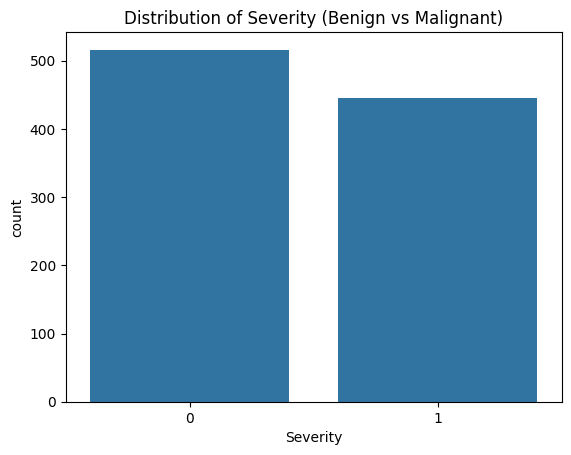

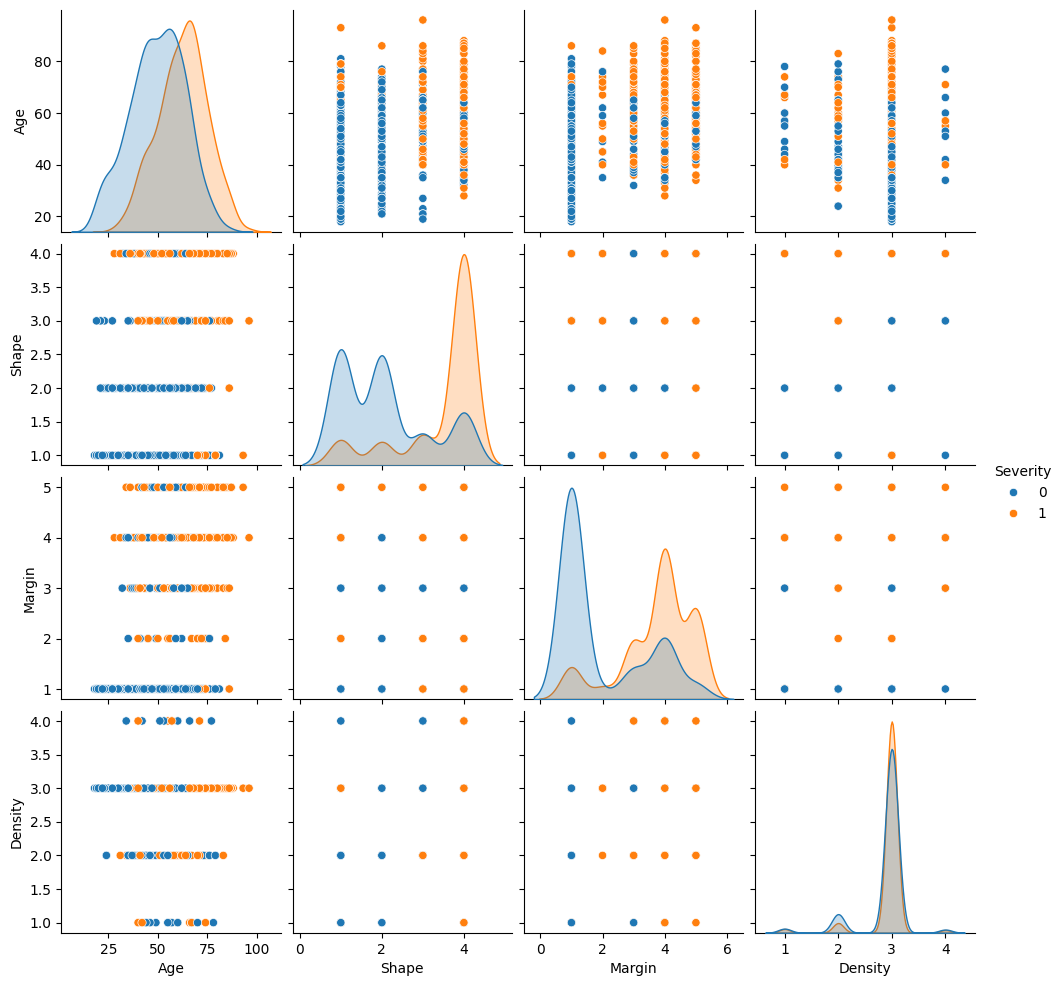

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Severity', data=df)
plt.title('Distribution of Severity (Benign vs Malignant)')
plt.show()

sns.pairplot(df, hue='Severity')
plt.show()


In [5]:
df['Severity'].value_counts()


,count
Severity,
0,516
1,445


Age         0.520291
Shape       3.225806
Margin      4.994797
Density     7.908429
Severity    0.000000
dtype: float64


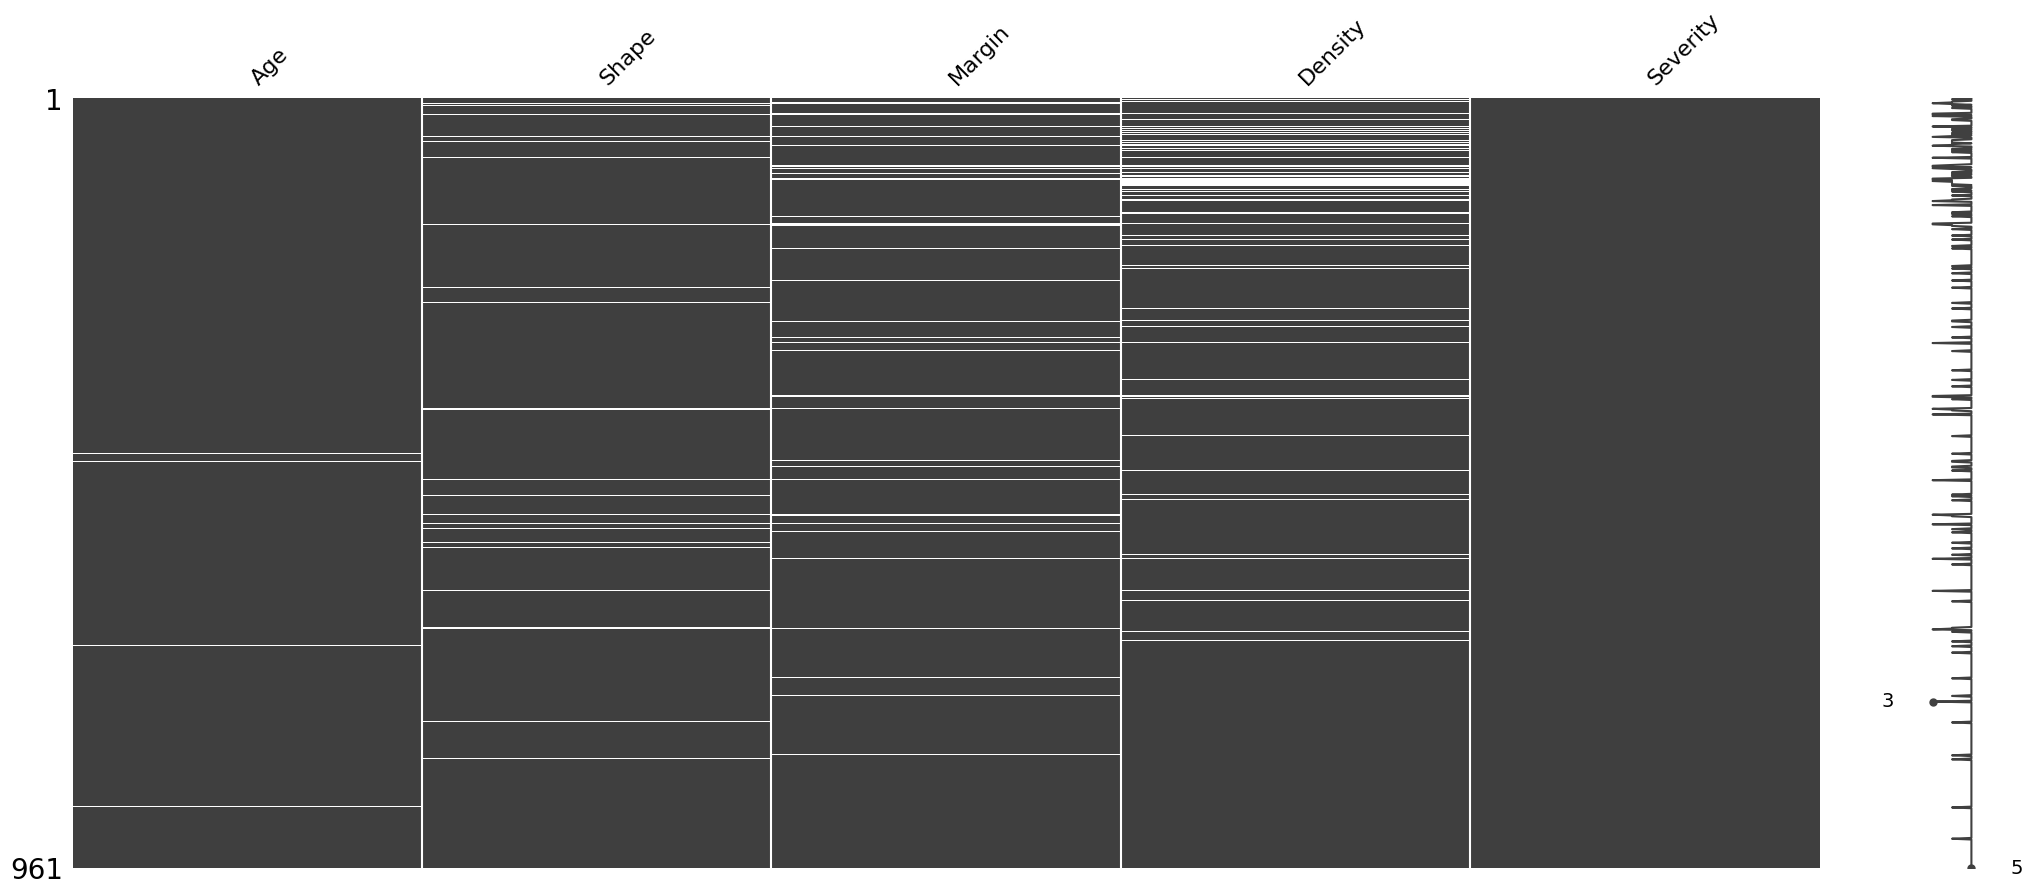

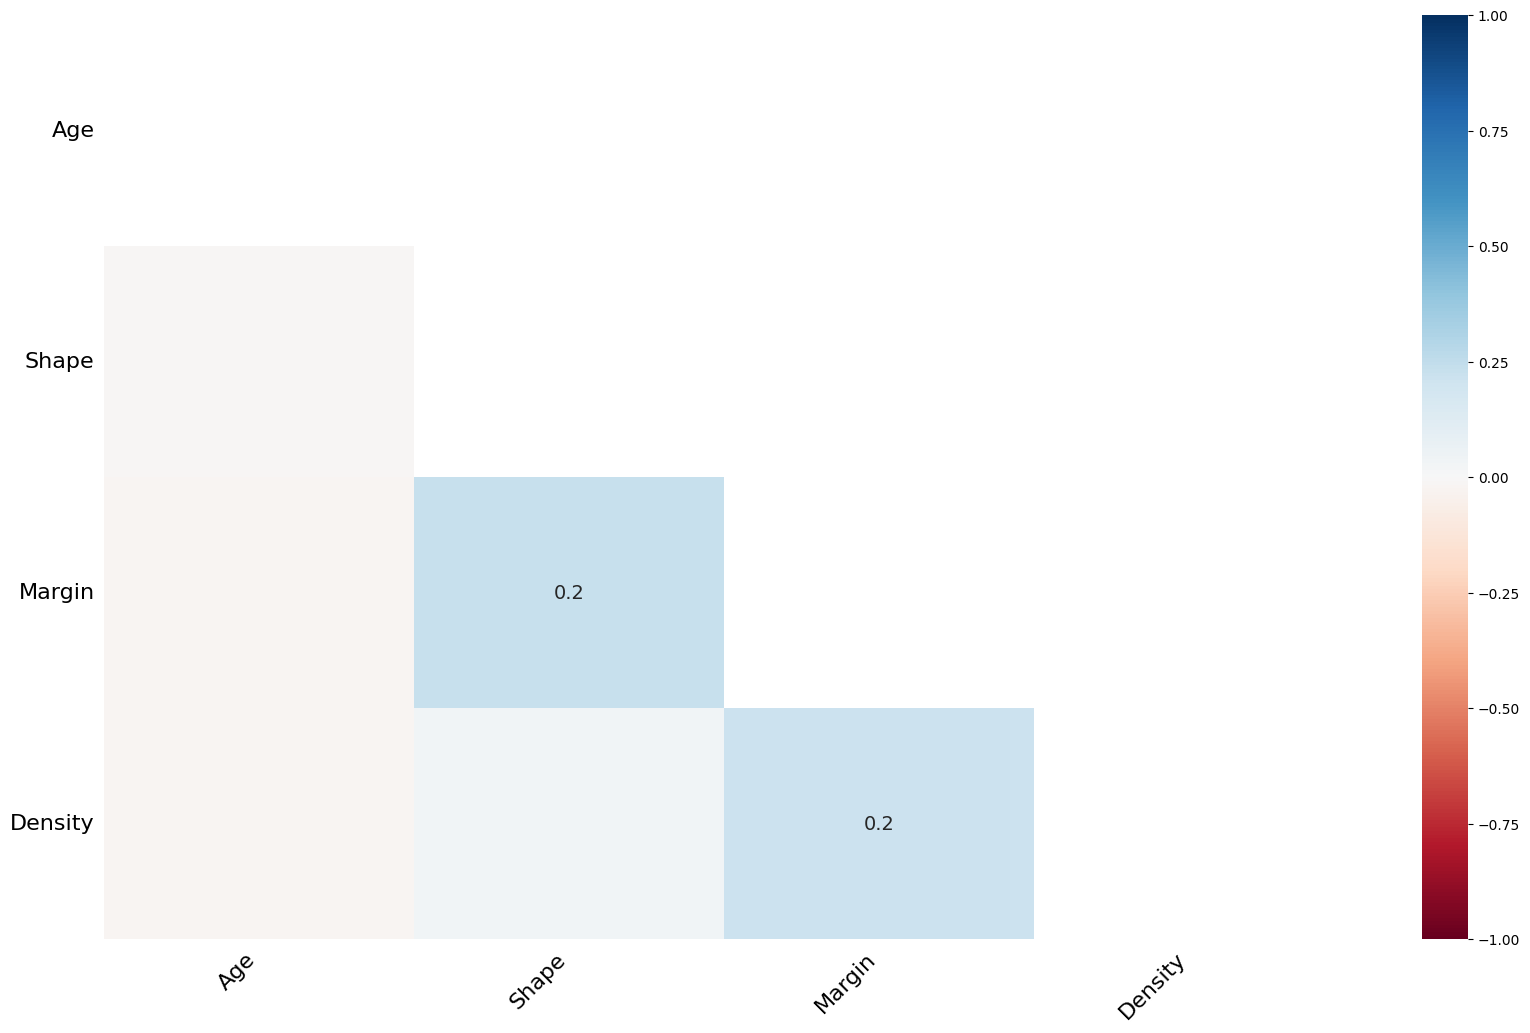

In [6]:
import missingno as msno

missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()


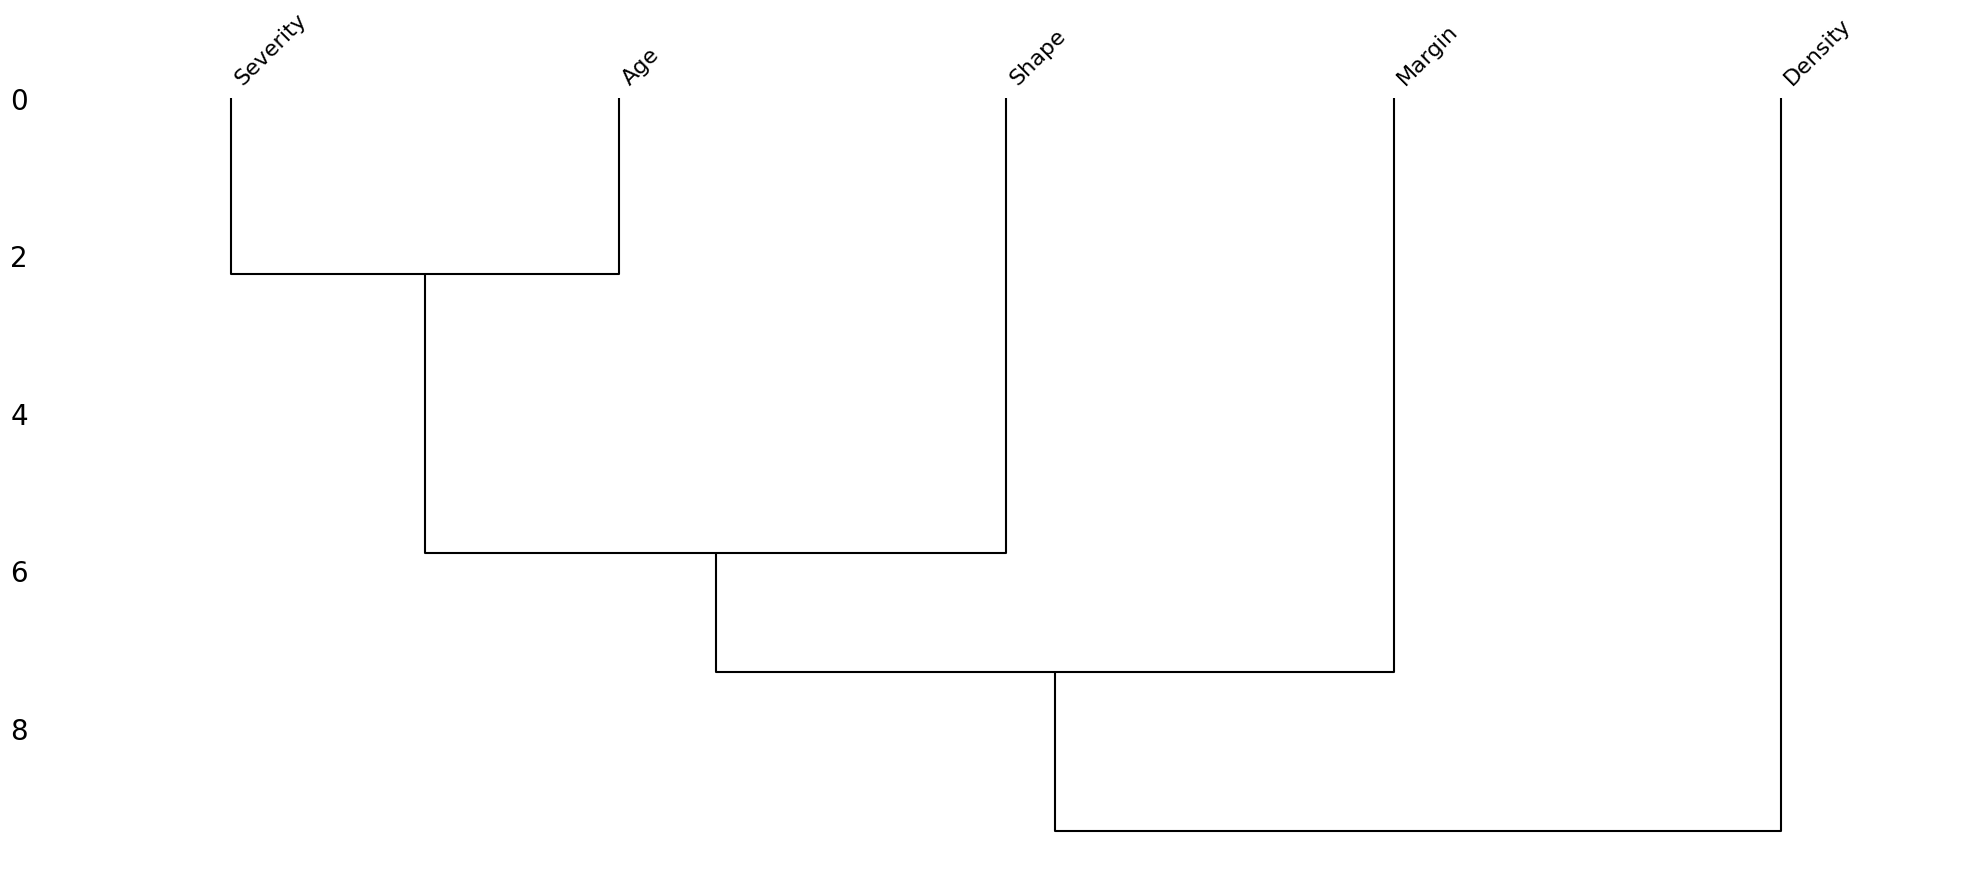

In [7]:
msno.dendrogram(df)
plt.show()


In [8]:
df.fillna(df.mean(), inplace=True)

missing_percentage_after = df.isnull().mean() * 100
print(missing_percentage_after)


Age         0.0
Shape       0.0
Margin      0.0
Density     0.0
Severity    0.0
dtype: float64


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Severity', axis=1)
y = df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test_scaled)

Accuracy: 0.78
Precision: 0.77
Recall: 0.77
F1 Score: 0.77


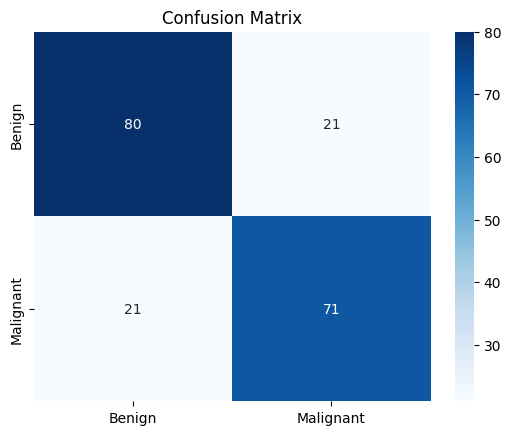

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.show()
